### Step-1: import libraries

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Step-2: Data Collection

In [118]:
df = pd.read_csv("flipkart_reviews.csv",usecols=['Review', 'Rating'])

In [119]:
df.head()

,Review,Rating
0,Best under 60k Great performanceI got it for a...,5
1,Good perfomence...,5
2,Great performance but usually it has also that...,5
3,My wife is so happy and best product 👌🏻😘,5
4,"Light weight laptop with new amazing features,...",5


### Step-3: Data Cleaning

In [120]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [121]:
df.shape

(2304, 2)

In [122]:
df.duplicated().any()

True

In [123]:
df[df.duplicated()]

,Review,Rating
148,Good,4
149,Very nice,5
178,Good,5
195,Good for simple use battery life is good but c...,3
196,Don't buy this phone it has bad camera quality,1
...,...,...
2270,Best display at this price range. Accurate col...,5
2271,Awesome,5
2272,It would have been great if the speaker had be...,5
2273,Getting 2 Blurred patches on the right hand si...,2


In [124]:
# Drop the duplicates values
df=df.drop_duplicates()

In [125]:
df.duplicated().any()

False

In [126]:
df.shape

(1373, 2)

In [127]:
def map_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['Rating'].apply(map_sentiment)


In [128]:
df['sentiment']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
2298    positive
2299    positive
2300    positive
2302    positive
2303    positive
Name: sentiment, Length: 1373, dtype: object

### Step-4: Text preprocessing

In [129]:
corpus=[]
ps=PorterStemmer()
stopword=set(stopwords.words('english'))
             
for review in df['Review']:
    review=re.sub('[^a-zA-Z]',' ',review)   # Keep only letters
    review=review.lower()
    review=review.split()
    review =[ps.stem(word) for word in review if word not in stopword]
    corpus.append(' '.join(review))

## Step 5: Convert Text to Vectors

In [288]:
#  TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(corpus).toarray()

In [289]:
# apply Labelconder
le = LabelEncoder()
y=le.fit_transform(df['sentiment'])

In [290]:
# negative ='0' ,neutral='1' , positive='2'
print(le.classes_)

['negative' 'neutral' 'positive']


In [291]:
df['sentiment'].value_counts()

sentiment
positive    1188
negative     119
neutral       66
Name: count, dtype: int64

### Step-6: Exploratory Data Analysis

<Axes: xlabel='sentiment', ylabel='count'>

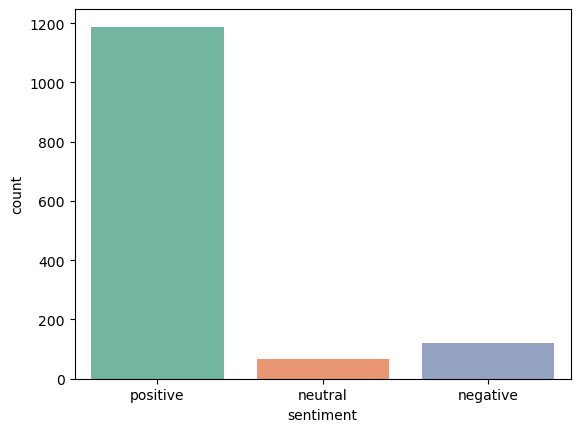

In [133]:
sns.countplot(df,x='sentiment',palette='Set2')

### positive review Word Cloud

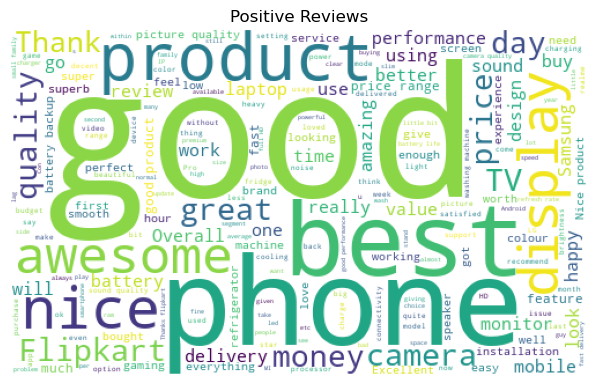

In [150]:
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['Review'])

wc = WordCloud(width=500, height=300, background_color='white')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(wc.generate(positive_reviews))
plt.title("Positive Reviews")
plt.axis('off')
plt.tight_layout()
plt.show()


### negative_reviews WordCloud

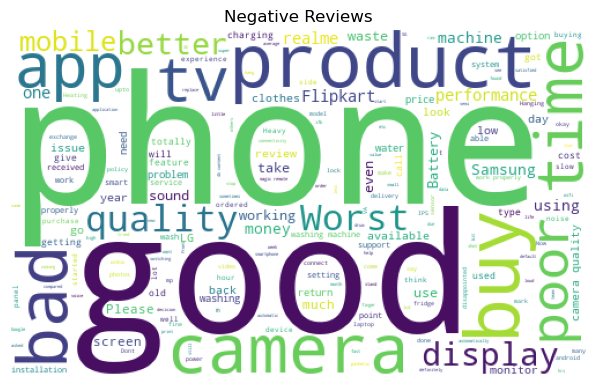

In [145]:
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['Review'])
wc = WordCloud(width=500, height=300, background_color='white')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.imshow(wc.generate(negative_reviews))
plt.title("Negative Reviews")
plt.axis('off')
plt.tight_layout()
plt.show()


### neutral_reviews Word Cloud

In [146]:
neutral_reviews = ' '.join(df[df['sentiment'] == 'neutral']['Review'])

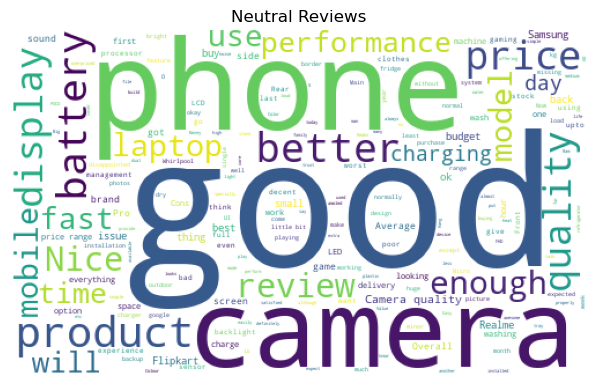

In [148]:
wc = WordCloud(width=500, height=300, background_color='white')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(wc.generate(neutral_reviews))
plt.title("Neutral Reviews")
plt.axis('off')
plt.tight_layout()
plt.show()

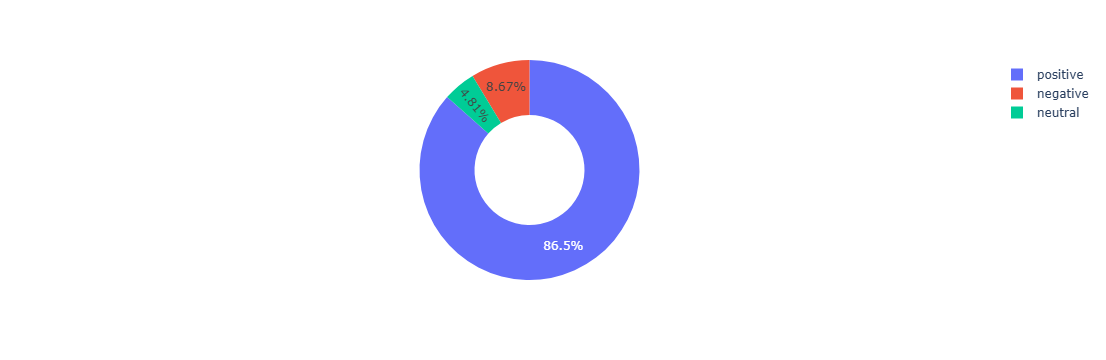

In [151]:
ratings = df["sentiment"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(df, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

In [157]:
## IMbalanced data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res,y_res=sm.fit_resample(X,y)

In [161]:
X_res.shape

(3564, 2985)

In [160]:
y_res.shape

(3564,)

## Step-7: Train-test-split the Data

In [268]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [269]:
X_train.shape

(2851, 2985)

In [270]:
y_train.shape

(2851,)

In [271]:
X_test.shape

(713, 2985)

### Step-8: Train and Evaluate the Model

In [274]:
mb = MultinomialNB()
mb.fit(X_train,y_train)
y_pred = mb.predict(X_test)

In [275]:
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("classification_report:\n",classification_report(y_test,y_pred))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("Weighted Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))


accuracy_score: 0.9102384291725105
classification_report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       219
           1       0.82      0.99      0.90       247
           2       0.98      0.76      0.86       247

    accuracy                           0.91       713
   macro avg       0.92      0.91      0.91       713
weighted avg       0.92      0.91      0.91       713

confusion_matrix:
 [[216   2   1]
 [  0 245   2]
 [  8  51 188]]
Weighted Recall: 0.9102384291725105
Macro F1 Score: 0.9108997858725161


In [277]:
lr =LogisticRegression()
lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)

In [279]:
print("accuracy_score:",accuracy_score(y_test,y_pred1))
print("classification_report:\n",classification_report(y_test,y_pred1))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred1))

accuracy_score: 0.9495091164095372
classification_report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       219
           1       0.91      0.98      0.94       247
           2       0.97      0.88      0.92       247

    accuracy                           0.95       713
   macro avg       0.95      0.95      0.95       713
weighted avg       0.95      0.95      0.95       713

confusion_matrix:
 [[218   0   1]
 [  0 241   6]
 [  4  25 218]]


In [280]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred2 = svm_model.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))



SVM Accuracy: 0.9621318373071529
[[219   0   0]
 [  0 244   3]
 [  3  21 223]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       219
           1       0.92      0.99      0.95       247
           2       0.99      0.90      0.94       247

    accuracy                           0.96       713
   macro avg       0.96      0.96      0.96       713
weighted avg       0.96      0.96      0.96       713



### Step-9: Cross-validation

In [281]:
from sklearn.metrics import recall_score,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score
score_acc_lr = cross_val_score(lr,X,y, cv=5, scoring='accuracy')
score_acc_mb = cross_val_score(mb,X,y, cv=5, scoring='accuracy')
score_acc_svm = cross_val_score(svm,X,y, cv=5, scoring='accuracy')
print('accuracy_lr:',score_acc_lr.mean())
print('accuracy_mb:',score_acc_mb.mean())
print('accuracy_svm:',score_acc_svm.mean())


accuracy_lr: 0.8819960185799604
accuracy_mb: 0.8652581287325815
accuracy_svm: 0.8965600530856005


In [282]:
train_acc=lr.score(X_train,y_train)
test_acc=lr.score(X_test,y_test)
print("Logistic Regression")
print('train_acc:',train_acc)
print('test_acc:',test_acc)

Logistic Regression
train_acc: 0.9698351455629604
test_acc: 0.9495091164095372


In [283]:
train_acc=mb.score(X_train,y_train)
test_acc=mb.score(X_test,y_test)
print("multinomialNB")
print('train_acc:',train_acc)
print('test_acc:',test_acc)

multinomialNB
train_acc: 0.933707471062785
test_acc: 0.9102384291725105


In [284]:
train_acc=svm.score(X_train,y_train)
test_acc=svm.score(X_test,y_test)
print("svm")
print('train_acc:',train_acc)
print('test_acc:',test_acc)

svm
train_acc: 0.9719396702911259
test_acc: 0.9621318373071529


### Step-10: Save the model

In [285]:
import joblib
joblib.dump(svm,'sentiment_analysis.pkl')
model=joblib.load('sentiment_analysis.pkl')

### Step-11: Predict the sentiment

In [286]:
def predict_sentiment(text):
    review = re.sub('[^a-zA-Z]', ' ', text.lower())
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    vector = vectorizer.transform([review]).toarray()
    prediction = svm.predict(vector)
    return le.inverse_transform(prediction)[0]


In [287]:
# Test
print(predict_sentiment("This phone is average"))
print(predict_sentiment("Excellent product! Loved it"))
print(predict_sentiment("Horrible. Don't buy it."))

neutral
positive
negative
